In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
data = pd.read_csv('ExtraaLearn.csv')

data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [3]:
#Exploratory data analysis (EDA)


data.dropna()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0


In [4]:
data['ID'].nunique()

4612

In [5]:
data.drop(["ID"], axis = 1, inplace = True)# Complete the code to drop "ID" column from data


In [6]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

In [7]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

(174, 14)

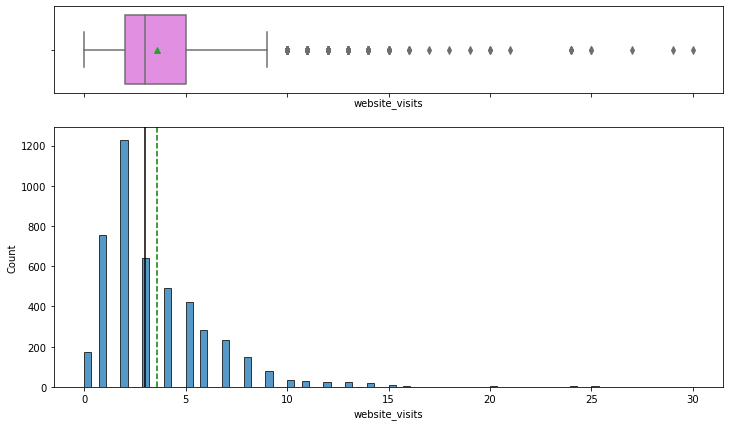

In [8]:
#observations for website visits 

histogram_boxplot(data,"website_visits")

data[data["website_visits"] == 0].shape

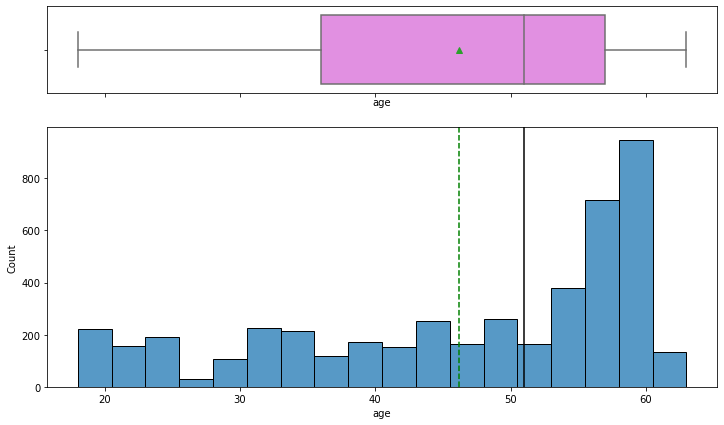

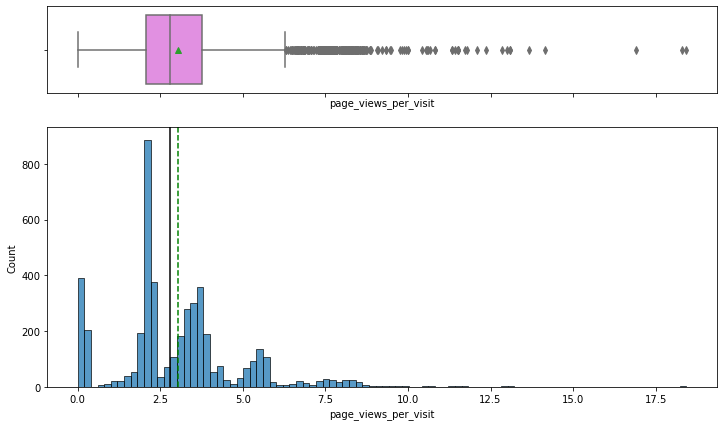

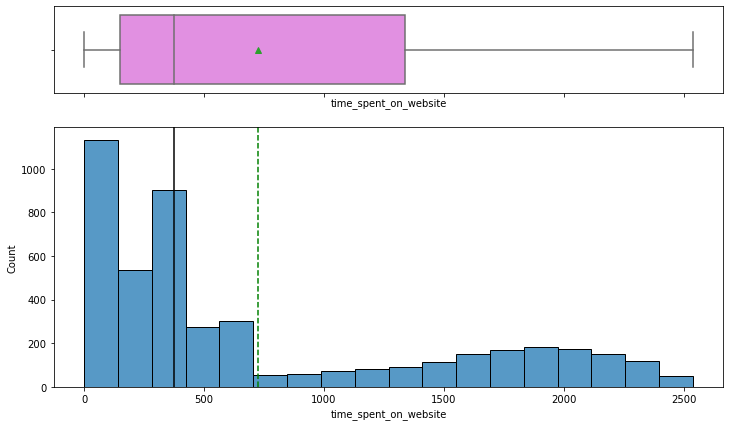

In [9]:
#Observations for age, page_views and time_spent_on_webiste

histogram_boxplot(data, "age") 
histogram_boxplot(data, "page_views_per_visit")
histogram_boxplot(data, "time_spent_on_website")

In [10]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    """

    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=17)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # 
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=13,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

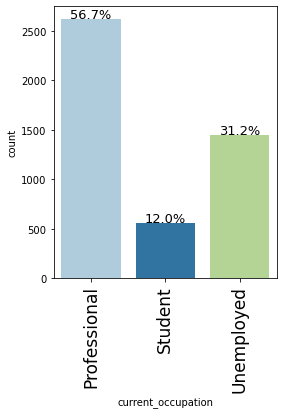

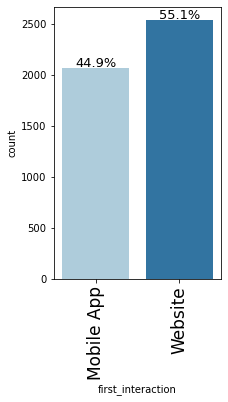

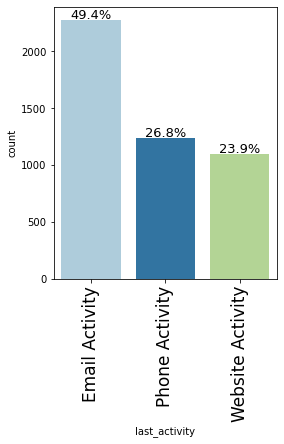

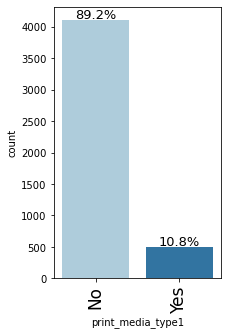

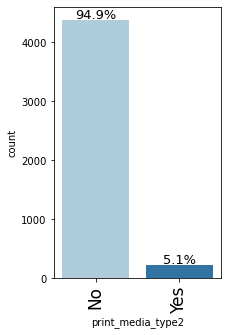

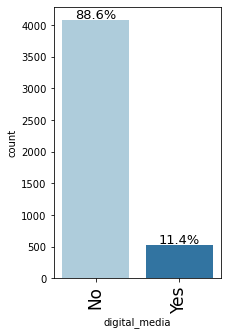

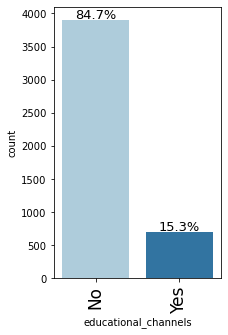

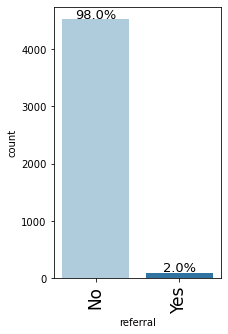

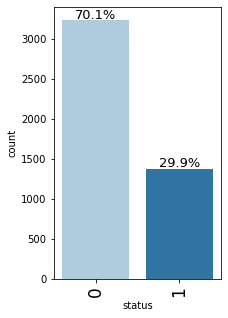

In [11]:
# All the barplots for each of the columns, all plots are labelled as well and written underneath

labeled_barplot(data, "current_occupation", perc=True)
labeled_barplot(data, 'first_interaction', perc = True)
labeled_barplot(data, 'last_activity', perc = True)
labeled_barplot(data, 'print_media_type1', perc = True)
labeled_barplot(data, 'print_media_type2', perc = True)
labeled_barplot(data, 'digital_media', perc = True)
labeled_barplot(data, 'educational_channels', perc = True)
labeled_barplot(data, 'referral', perc = True)
labeled_barplot(data, 'status', perc = True)

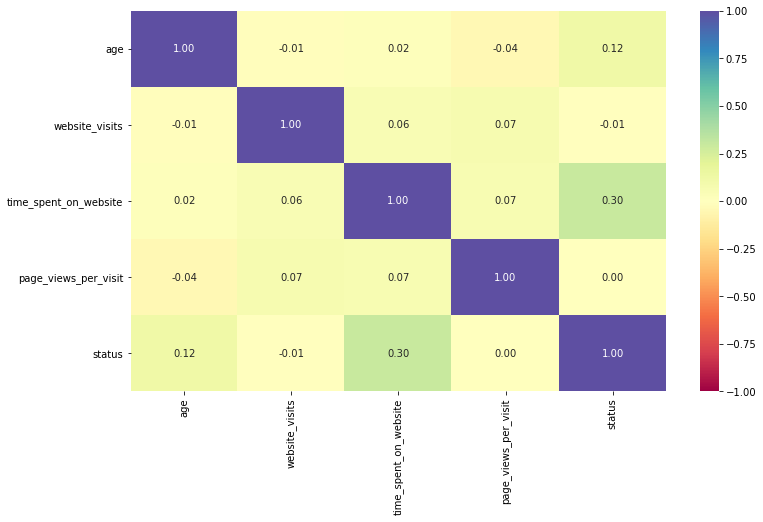

In [12]:
# Continuing with Exploratory Analysis

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


In [13]:
#barplots
def stacked_barplot(data, predictor, target):
    """
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [14]:

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

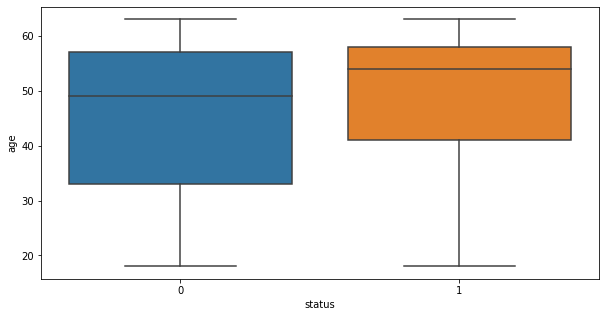

In [74]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["status"], y = data["age"])
plt.show()


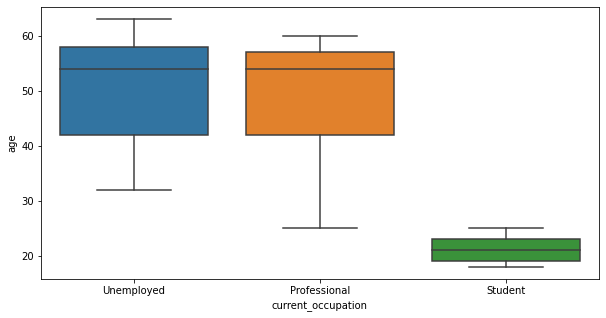

In [75]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()


status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555


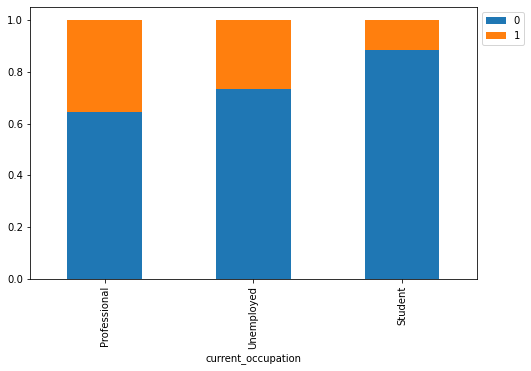

In [15]:
# Answering of Questions

#Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.


stacked_barplot(data, "current_occupation", "status")

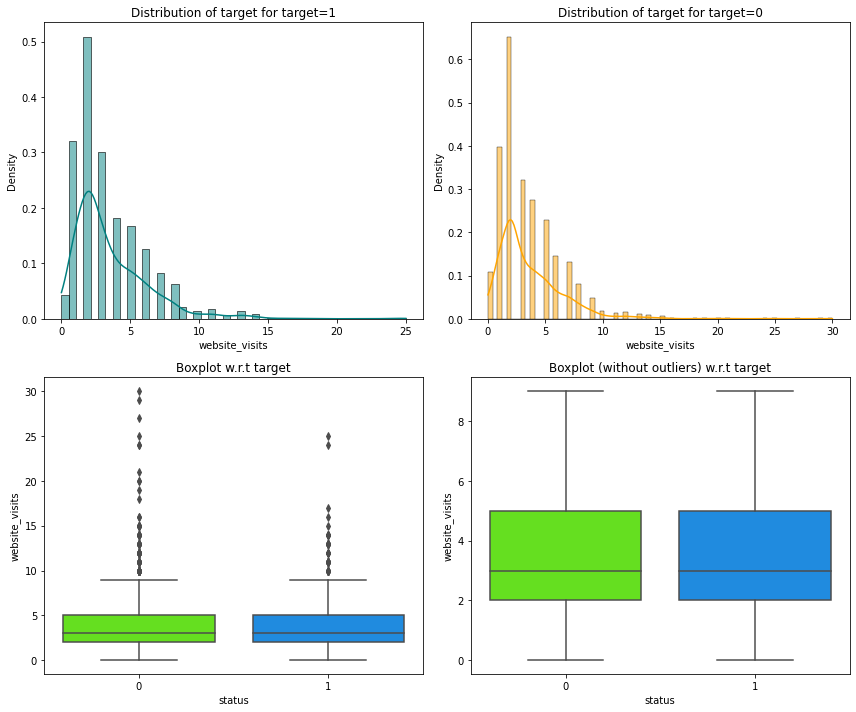

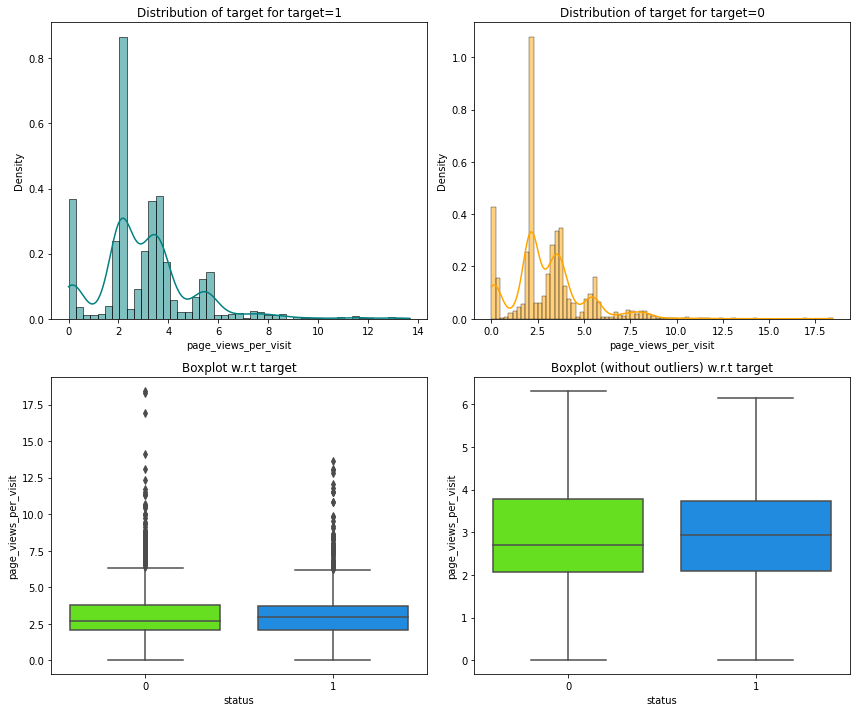

In [16]:
#Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?


distribution_plot_wrt_target(data, "website_visits", "status")
distribution_plot_wrt_target(data, "page_views_per_visit", "status")



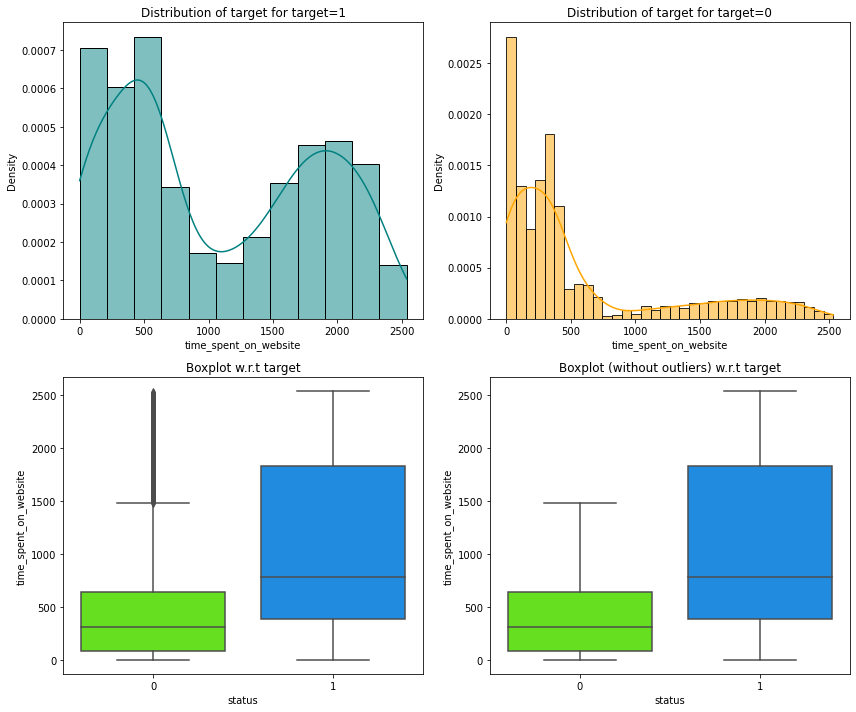

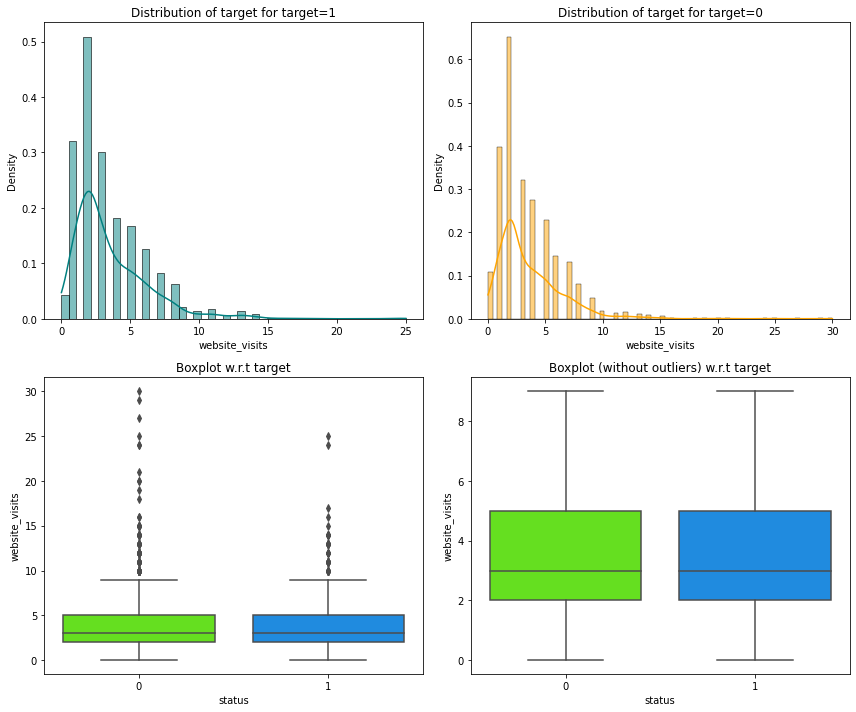

In [17]:
# Question 3:The company uses multiple modes to interact with prospects. Which way of interaction works best?

distribution_plot_wrt_target(data, "time_spent_on_website", "status")
distribution_plot_wrt_target(data, "website_visits", "status")



status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234


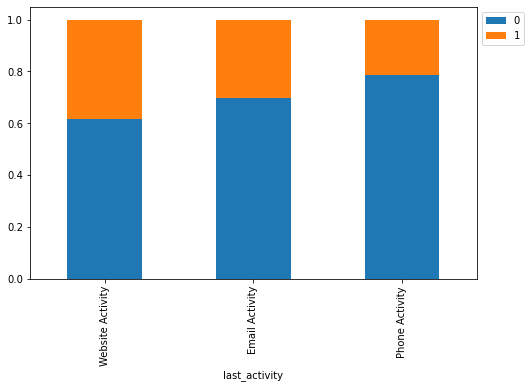

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497


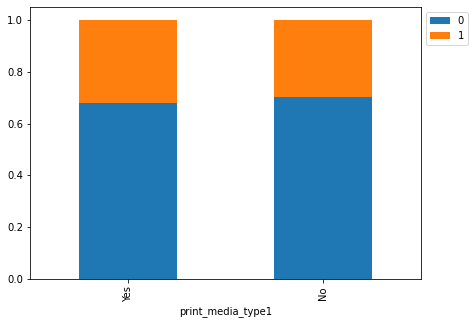

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233


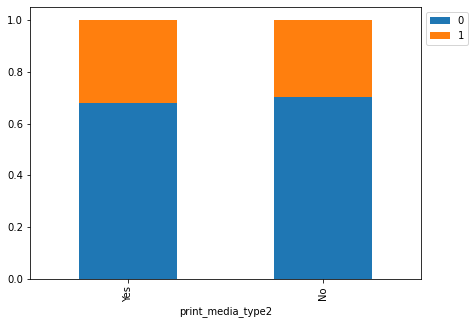

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527


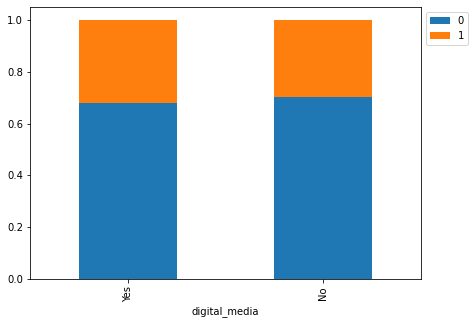

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705


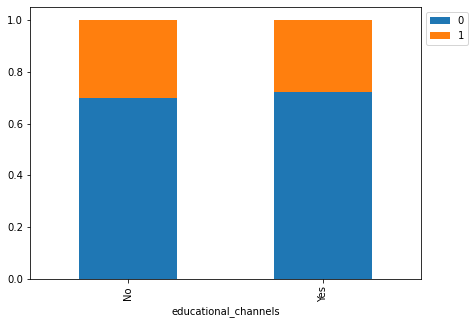

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93


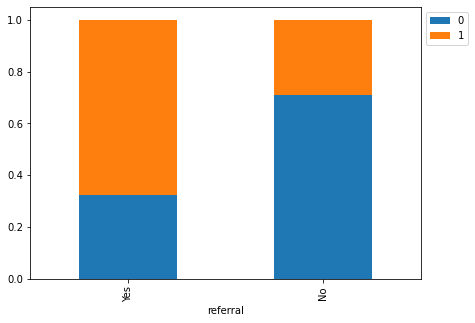

In [18]:
#Question 4: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

stacked_barplot(data, "last_activity", "status") 

# advertising to status comparision 

stacked_barplot(data, "print_media_type1", "status")
stacked_barplot(data, "print_media_type2", "status")
stacked_barplot(data, "digital_media", "status")
stacked_barplot(data, "educational_channels", "status")
stacked_barplot(data, "referral", "status")

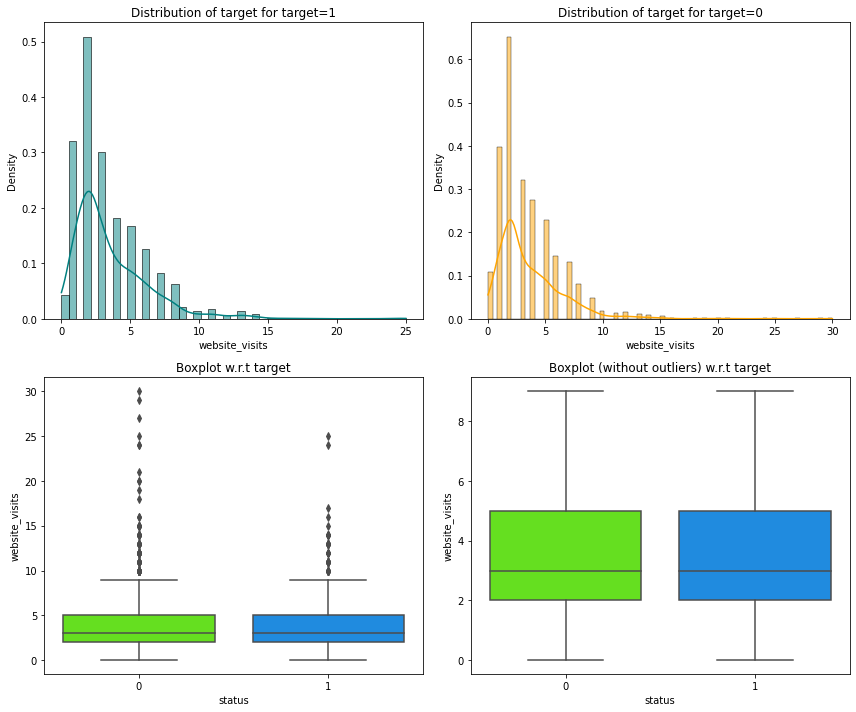

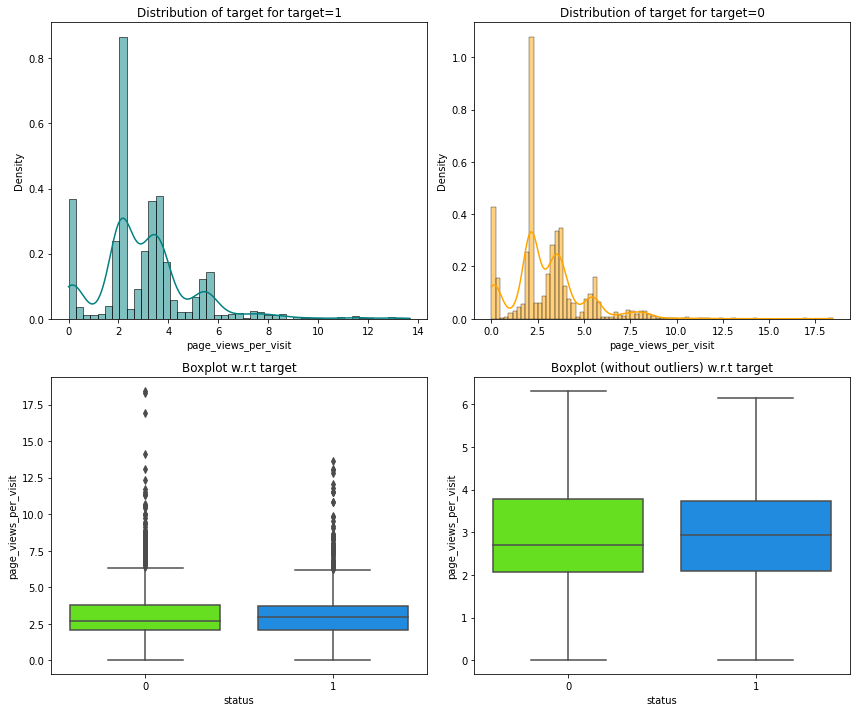

In [19]:
# Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?
 
distribution_plot_wrt_target(data, "website_visits", "status")
distribution_plot_wrt_target(data, "page_views_per_visit", "status")


status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070


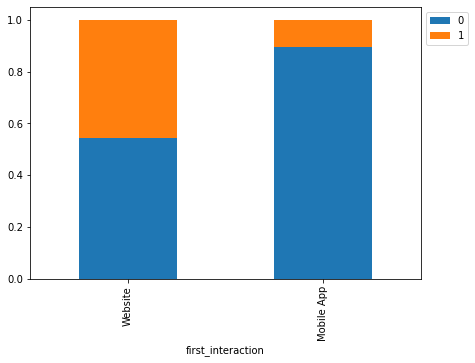

In [20]:
#Question 5 :People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information.

stacked_barplot(data, "first_interaction", "status")  


status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234


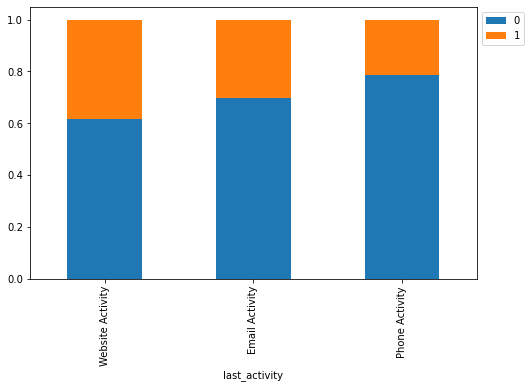

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497


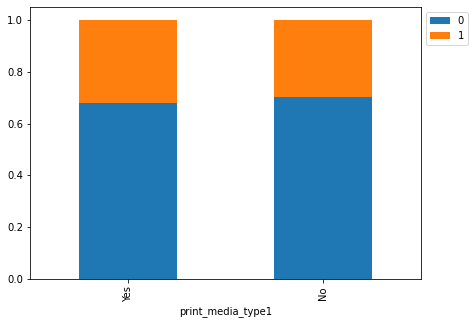

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233


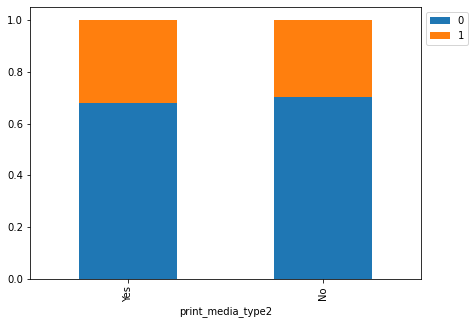

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527


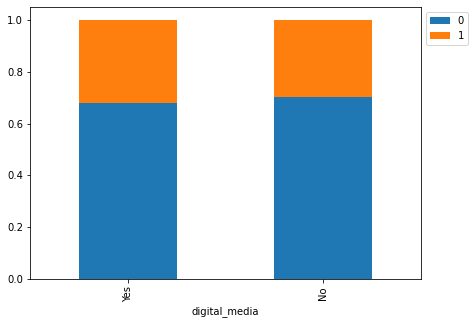

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705


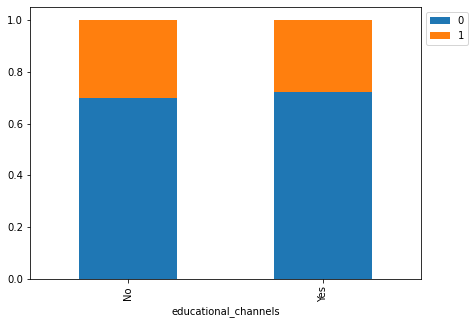

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93


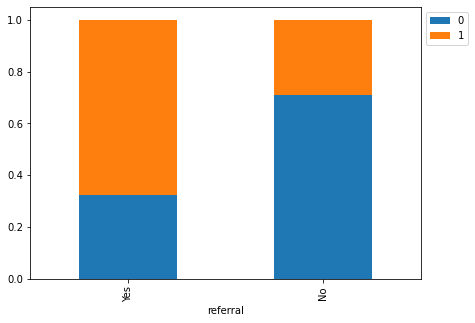

In [21]:
#Question: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

stacked_barplot(data, "last_activity", "status") 

# advertising to status comparision 

stacked_barplot(data, "print_media_type1", "status")
stacked_barplot(data, "print_media_type2", "status")
stacked_barplot(data, "digital_media", "status")
stacked_barplot(data, "educational_channels", "status")
stacked_barplot(data, "referral", "status")






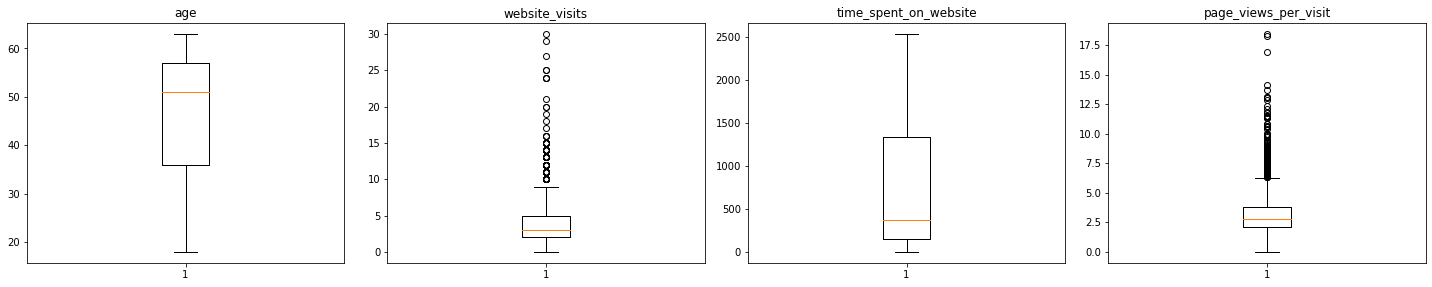

In [22]:
num_col = data.select_dtypes(include=np.number).columns.tolist()

num_col.remove("status")

plt.figure(figsize=(20, 15))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [45]:
X = data.drop(["status"], axis=1)
y = data['status']

X = pd.get_dummies(X, drop_first=True) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)


In [46]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


In [53]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (10, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [54]:
# building decision tree

# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier()

d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



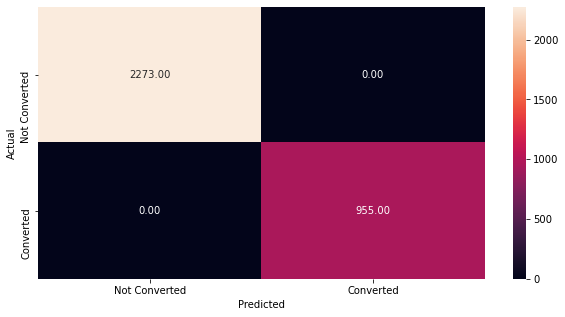

In [55]:
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       962
           1       0.71      0.69      0.70       422

    accuracy                           0.82      1384
   macro avg       0.79      0.78      0.79      1384
weighted avg       0.82      0.82      0.82      1384



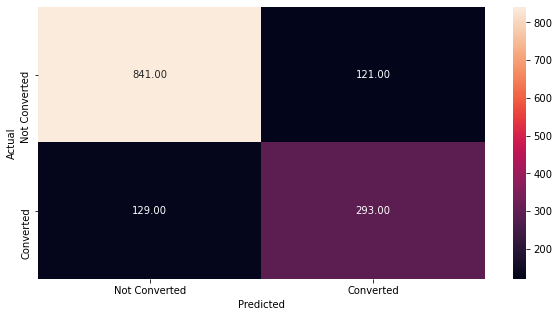

In [56]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [57]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



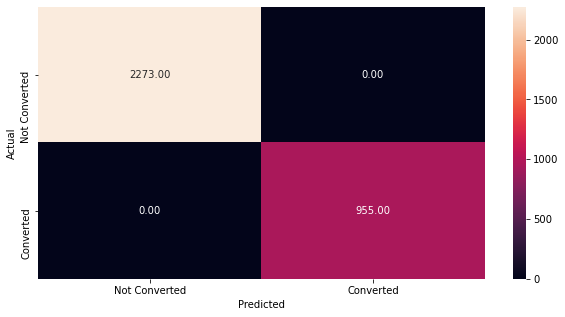

In [59]:
# Checking performance on the training data
y_pred_train2 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



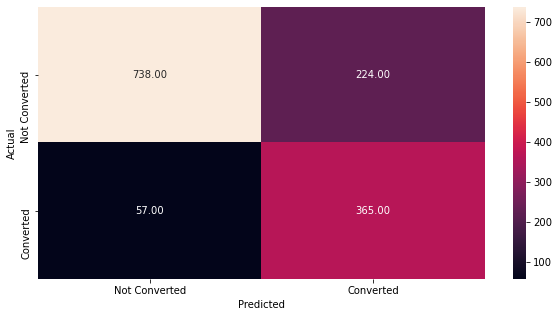

In [60]:
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

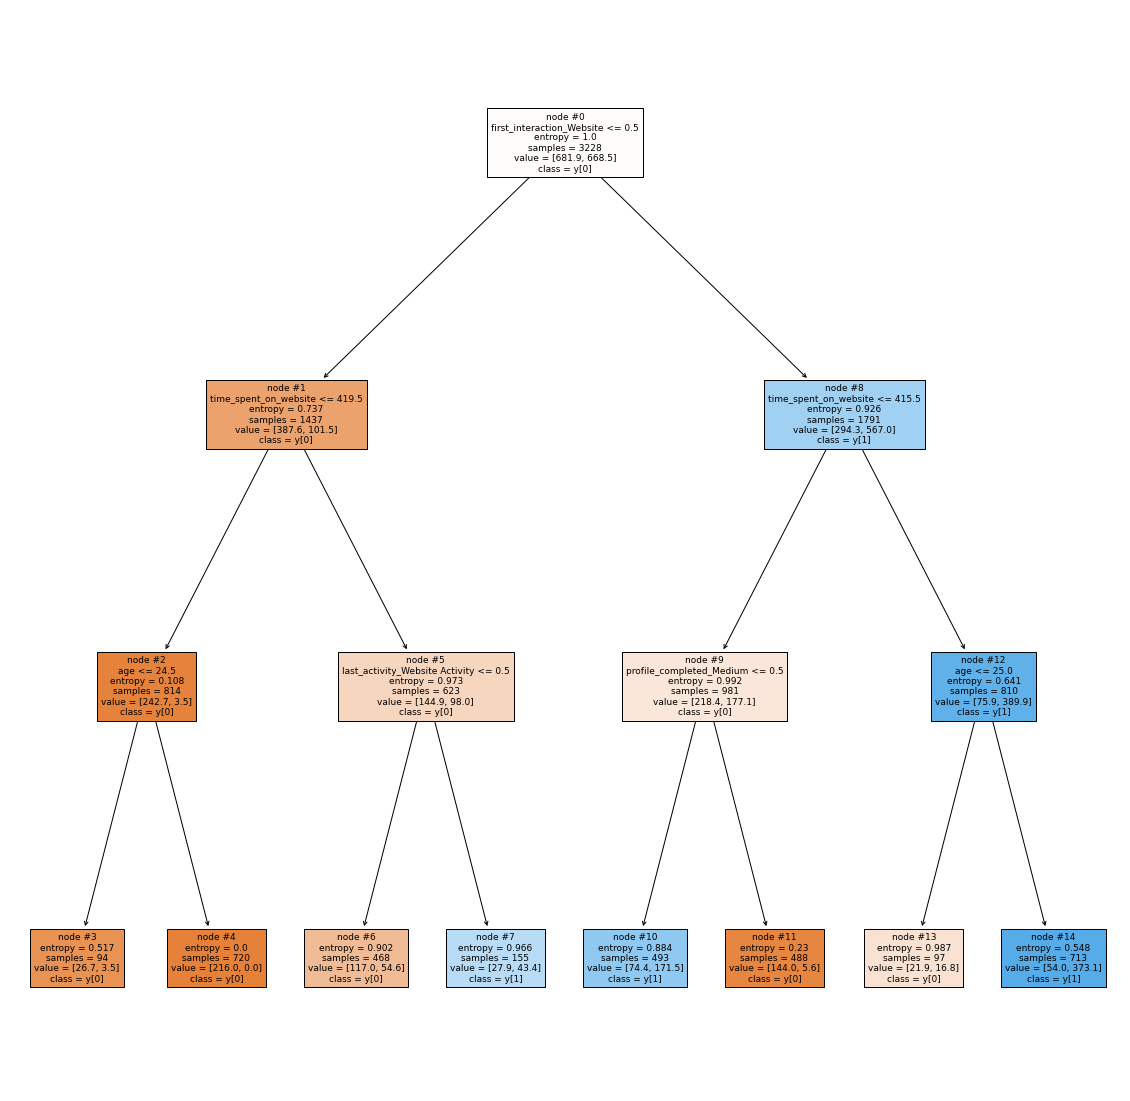

In [61]:
#Visualize the tree

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [64]:
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Importance_Value"], index = X_train.columns).sort_values(by = 'Importance_Value', ascending = False))


                                Importance_Value
time_spent_on_website                    0.34814
first_interaction_Website                0.32718
profile_completed_Medium                 0.23927
age                                      0.06389
last_activity_Website Activity           0.02151
website_visits                           0.00000
page_views_per_visit                     0.00000
current_occupation_Student               0.00000
current_occupation_Unemployed            0.00000
profile_completed_Low                    0.00000
last_activity_Phone Activity             0.00000
print_media_type1_Yes                    0.00000
print_media_type2_Yes                    0.00000
digital_media_Yes                        0.00000
educational_channels_Yes                 0.00000
referral_Yes                             0.00000


In [66]:
# Random Forest Classifier

# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



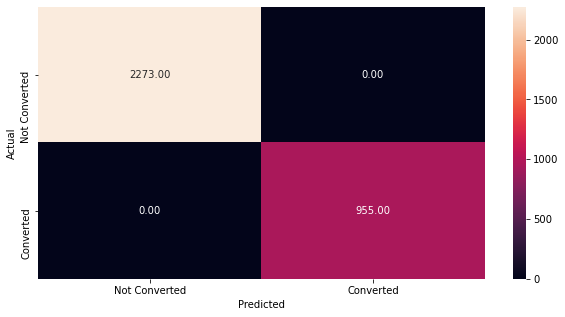

In [68]:
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



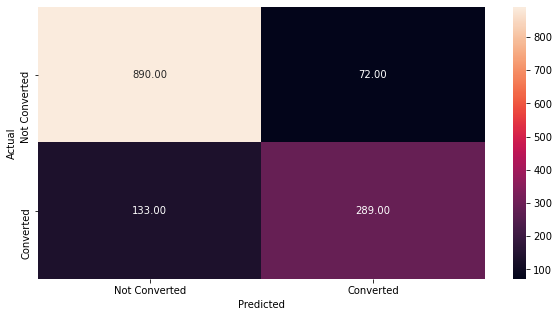

In [69]:
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

In [71]:
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = __________________

grid_obj = __________________

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = ________________

In [ ]:
# Conclusions 

# 1. The time spent on the website is very important to conversion rates, the longer a customer spends on a website the higher the convertion rate.
# 2. Age is also a factor as there is a higher percentage of people who are older converting to the channel. 

# Recommendations

# 1. Use more advertisments or catchy titles to keep customers on the website and interested
# 2. To increase converstion rates amoungst younger people they should advertise on college websites or high traffuc student websites.